In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [ ]:
np.random.seed(13) # начало генератора случайных чисел, чтобы после перезапуска были одинаковые
N=100 # число точек в одном классе

In [ ]:
# первый класс, случайные точки вокруг (-20, -20) выход = -1
x1 = -20+5*np.random.randn(N, 1) 
y1 = -20+5*np.random.randn(N, 1) 
z1=-1*np.ones((100,1)) 

In [ ]:
# второй класс, случайные точки вокруг (+20, +20) выход = +1
x2 = 20+5*np.random.randn(N, 1) 
y2 = 20+5*np.random.randn(N, 1) 
z2=+1*np.ones((100,1)) 

In [ ]:
# Объединяем массивы в один 
Input=np.hstack((np.vstack((x1, x2)),np.vstack((y1 , y2))))
Output=np.vstack((z1,z2))

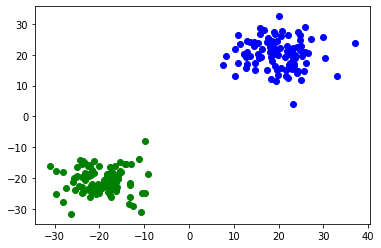

In [ ]:
fig, ax = plt.subplots()
# рисуем обучающие точки своим цветом
ax.scatter(Input[0:N-1,0],Input[0:N-1,1],color='green')
ax.scatter(Input[N:,0],Input[N:,1],color='blue')

In [ ]:
# создаем и обучаем линейную регрессию
linr = linear_model.LinearRegression() # создадим ее. normalize=False если хотим без нормализации
linr.fit(Input, Output) # обучим модель, принудительно переформатировав размеры массивов
print('Обученные параметры b={d[0]} a={d[1]}'.format(d=(linr.intercept_, linr.coef_))) 
out_pred=linr.predict(Input)# посчитаем выход модели

Обученные параметры b=[0.00617499] a=[[0.02080333 0.0275432 ]]


In [ ]:
# Если выход меньше нуля - принимаем за первый класс, если больше - за второй
# найдем ошибки, т.е. не совпадение между истинными классами и полученными моделью 
err1=(out_pred>0) & (Output==-1)# думаем что второй, а на самом деле первый класс
err2=(out_pred<0) & (Output==+1)# думаем что первый, а на самом деле второй класс
err1=err1[:,0]
err2=err2[:,0]

In [ ]:
# нарисуем ошибки
ax.scatter(Input[err1,0],Input[err1,1],color='yellow',marker='x')
ax.scatter(Input[err2,0],Input[err2,1],color='magenta',marker='x')

In [ ]:
# возьмем много точек плоскости
h=0.2
x_min,y_min=Input.min(axis=0)-10
x_max, y_max=Input.max(axis=0)+10
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) # точки плоскости из равномерной сетки
Input_test=np.c_[xx.ravel(), yy.ravel()]

In [ ]:
# посчитаем для них выходы обученной линейной регрессии
zz = linr.predict(Input_test)
zz = zz.reshape(xx.shape)
zz[zz>0]=1 # больше нуля - второй класс
zz[zz<0]=-1 # меньше нуля - первый класс
ax.contourf(xx, yy, zz, cmap=plt.cm.coolwarm, alpha=0.8); # рисуем цветом выходы для всех точек плоскости

In [ ]:
# рисуем прямую
xxx=np.arange(x_min,x_max,h)
yyy=-(linr.intercept_[0] + linr.coef_[0][0]*xxx)/linr.coef_[0][1] # x2=-(a1*x1+b)/a2

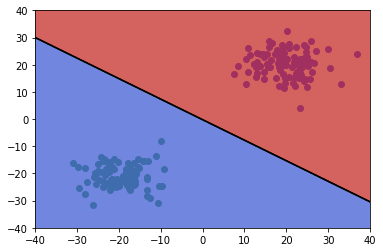

In [ ]:
ax.plot(xxx,yyy,color='black');
ax.set_xlim([-40, 40])
ax.set_ylim([-40, 40])
fig